# Lecture 6

### Main Sequence of Star Forming galaxies

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy
from astropy.table import Table
#!pip install pandas
import pandas
import matplotlib

Read the fits file and extract the stellar mass and the SFR

In [2]:
data=Table.read('SDSS_LAB2024_CIGALEresults.fits', format = 'fits')
data=data.to_pandas()
mass=np.array(data.loc[:,"best_stellar_m_star"])
sfr=np.array(data.loc[:,"best_sfh_sfr"])
age=np.array(data.loc[:,"best_sfh_age"])
tau=np.array(data.loc[:,"best_sfh_tau_main"])

Compute the log of the data

In [3]:
MASS = np.log10(mass)
SFR = np.log10(sfr)

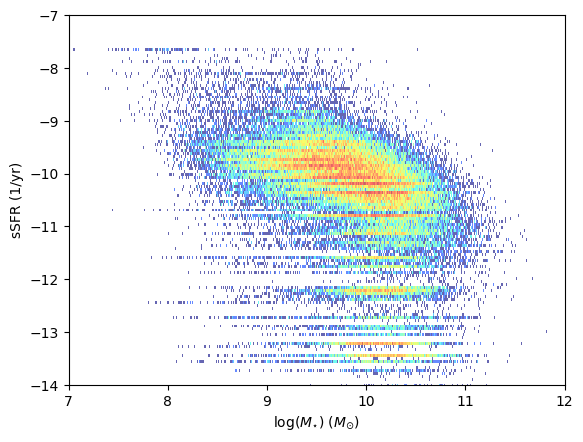

In [4]:
sSFR = SFR - MASS

plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

In [5]:
# Cut the data
thr = -10.6
mask = sSFR > thr
MASS_filtered = MASS[mask]
sSFR_filtered = sSFR[mask]

print("Vettore x filtrato:", MASS_filtered)
print("Vettore y filtrato:", sSFR_filtered)

Vettore x filtrato: [ 9.29994445 10.28013151  9.42962306 ...  9.07951597 10.58629297
  9.5275906 ]
Vettore y filtrato: [ -9.68092327 -10.17831724  -9.61341332 ... -10.20561406 -10.26293619
  -9.92313042]


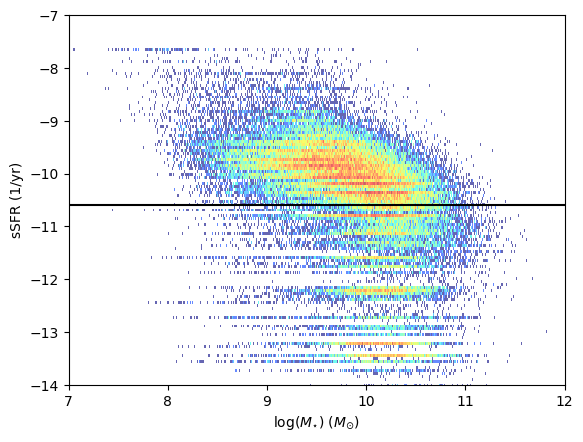

In [6]:
plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')

plt.show()

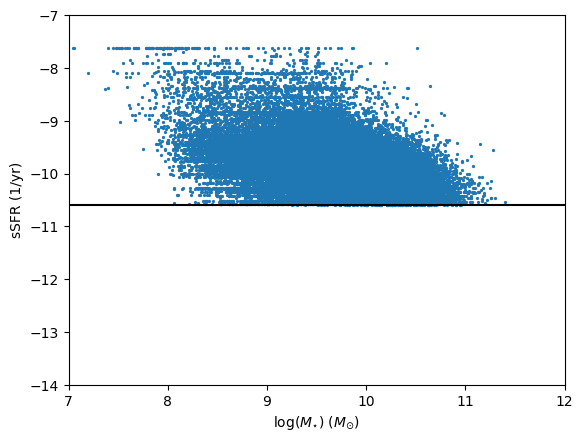

In [7]:
plt.scatter(MASS_filtered, sSFR_filtered, marker='.', s=7, alpha=1)
#plt.plot(MASS, np.polyval(par_new, MASS), color='red')

plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')

plt.show()

Is the fraction of AGN correlated to the other galaxy properties?

In [8]:
spec=Table.read('SDSS_LAB2024_spectroscopy.fits', format = 'fits')
spec=spec.to_pandas()
metallicity=np.array(spec.loc[:,"log_oh"])

mask = metallicity > -9998

MASS_metal = MASS[mask]
sSFR_metal = sSFR[mask]

In [9]:
oiii = np.array(spec.loc[:,'oiii_5007_flux'])
oiii_err = np.array(spec.loc[:, 'oiii_5007_flux_err'])
nii = np.array(spec.loc[:,'nii_6584_flux'])
nii_err = np.array(spec.loc[:, 'nii_6584_flux_err'])
halpha = np.array(spec.loc[:,'h_alpha_flux'])
halpha_err = np.array(spec.loc[:,'h_alpha_flux_err'])
hbeta = np.array(spec.loc[:,'h_beta_flux'])
hbeta_err = np.array(spec.loc[:, 'h_beta_flux_err'])

We plot the ratios between emission line fluxes

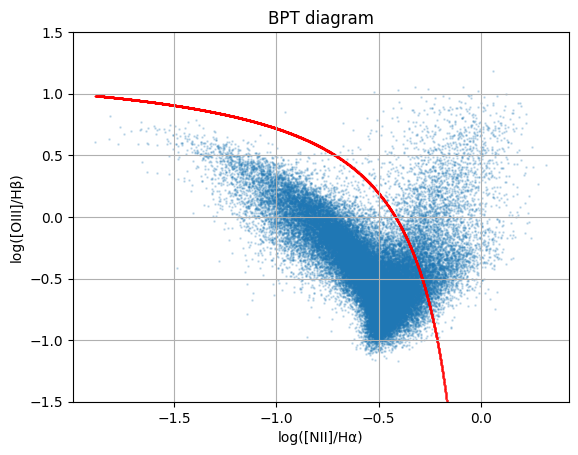

In [10]:
mask_lines = (oiii/oiii_err > 5) & (nii/nii_err > 5) & (halpha/halpha_err > 5) & (hbeta/hbeta_err > 5)
oiii_lines = oiii[mask_lines]
nii_lines = nii[mask_lines]
halpha_lines = halpha[mask_lines]
hbeta_lines = hbeta[mask_lines]
mass_lines = mass[mask_lines]
MASS_lines = MASS[mask_lines]
sSFR_lines = sSFR[mask_lines]

y = np.log10(oiii_lines/hbeta_lines)
x = np.log10(nii_lines/halpha_lines)

def agn (x):
    return 0.61/(x-0.05) + 1.3

x_grid = np.linspace(np.min(x), np.max(x), 10000)
plt.scatter(x, y, marker = '.', s = 3, alpha=0.2)
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.ylim(-1.5,1.5)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.grid()
plt.show()

Galaxies in which gas is ionized by the presence of an AGN are green dots.

Galaxies in which gas is ionized by groups of young stars are orange dots.

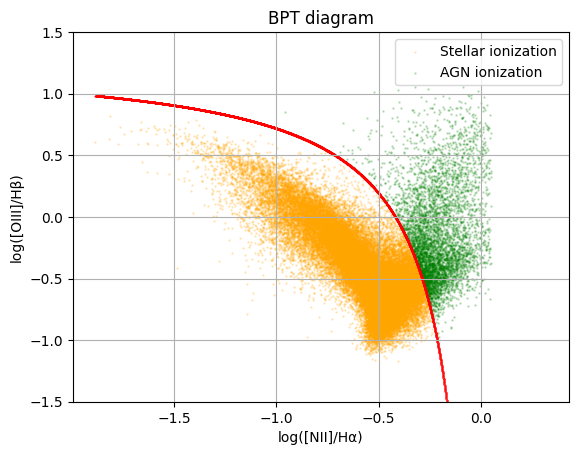

In [11]:
mask_agn = (y > agn(x)) 
y_new = y[mask_agn]
x_new = x[mask_agn]
mass_new = mass_lines[mask_agn]

mask_stellar = (y < agn(x)) & (x < 0)
y_s = y[mask_stellar]
x_s = x[mask_stellar]
mass_s = mass_lines[mask_stellar]

plt.scatter(x_s, y_s, marker = '.', s = 3, color = 'orange', alpha=0.2, label='Stellar ionization')
plt.scatter(x_new, y_new, marker = '.', s = 3,color = 'g', alpha=0.2, label='AGN ionization')
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.legend()

plt.ylim(-1.5,1.5)
plt.grid()
plt.show()

In [12]:
sSFR_agn = sSFR_lines[mask_agn]
sSFR_s = sSFR_lines[mask_stellar]
MASS_agn = MASS_lines[mask_agn]
MASS_s = MASS_lines[mask_stellar]

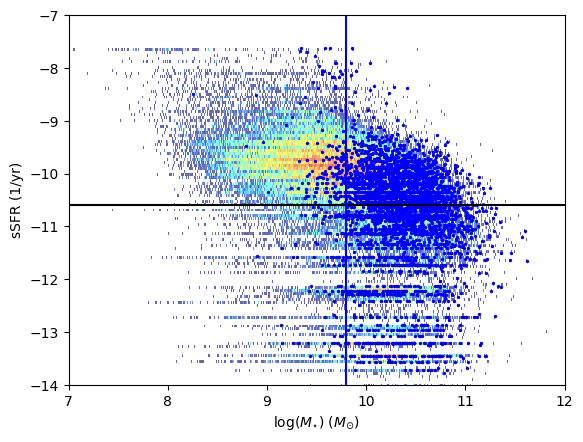

In [24]:
plt.hist2d(MASS, sSFR, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
#plt.scatter(MASS_s, sSFR_s, color = 'pink', label='stellar', s = 2, alpha = 0.5)
plt.scatter(MASS_agn, sSFR_agn, color = 'blue', label='AGN', s = 2)

plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

plt.axhline(thr, color = 'k')
plt.axvline(9.8, color = 'b')

#plt.legend()
plt.show()

In [ ]:
# Definisci i bin per l'asse x (modifica il numero di bin secondo necessità)
num_bins = 20
bins = np.linspace(min(mass), max(mass), num_bins + 1)

# Calcola la media delle y per ogni bin
bin_indices = np.digitize(x, bins) - 1  # trova l'indice del bin per ogni x
bin_means = np.zeros(num_bins)

for i in range(num_bins):
    bin_y_values = y[bin_indices == i]
    if len(bin_y_values) > 0:
        bin_means[i] = np.mean(bin_y_values)
    else:
        bin_means[i] = np.nan  # oppure 0 o un altro valore se preferisci
